##### Import packages needed to process dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

##### Extract dataset

In [2]:
df = pd.read_csv('ONLINETAXI_TRANSACTION.csv')
df.head()

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165


##### Check the features on the dataset such as the datatype, null values, null percentage, and unique values

In [4]:
dfDesc = []
for i in df.columns:
    dfDesc.append([i, 
                   df[i].dtypes, 
                   df[i].isna().sum(),
                   round(((df[i].isna().sum() / len(df)) * 100), 2),
                   df[i].nunique(),
                   df[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(
data=dfDesc,
columns = [
    'features',
    'DataType',
    'Null',
    'NullPercentage',
    'Unique',
    'Unique Sample'
])

,features,DataType,Null,NullPercentage,Unique,Unique Sample
0,VENDOR,int64,0,0.0,3,"[1, 4]"
1,passenger_count,int64,0,0.0,9,"[2, 4]"
2,trip_distance,float64,0,0.0,2533,"[16.69, 5.64]"
3,rate_code,int64,0,0.0,7,"[4, 6]"
4,store_and_fwd_flag,object,0,0.0,2,"[N, Y]"
5,payment_type,int64,0,0.0,4,"[4, 1]"
6,fare_amount,float64,0,0.0,511,"[25.3, 24.0]"
7,extra,float64,0,0.0,11,"[0.0, 0.8]"
8,mta_tax,float64,0,0.0,5,"[0.0, 2.38]"
9,tip_amount,float64,0,0.0,1449,"[15.17, 15.08]"


##### Feature understanding

- Vendor: A code indicating the TPEP provider that provided the record. TPEP is a vendor who has [contracted with] been authorized by the Commission to install and maintain the Taxicab Technology System in Taxicabs.
- passenger_count: The number of passengers in the vehicle.
- trip_distance: The elapsed trip distance in miles reported by the taximeter
- rate_code: The final rate code in effect at the end of the trip.
    - 1 = Standard Rate
    - 2 = JFK
    - 3 = Newark
    - 4 = Nassau or Westchester
    - 5 = Negotiated fare
    - 6 = Group ride


- store_and_fwd_flag: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.
    - Y = store and forward trip
    - N = not a store and forward trip

- payment_type: A numeric code signifying how the passenger paid for the trip. 
- fare_amount: The time-and-distance fare calculated by the meter.
- extra: Miscellaneous extras and surcharges.
- mta_tax: Tax for the Metropolitan Transportation Authority
- tip_amount: This field is automatically populated for credit card tips. Cash tips are not included.
- tolls_amount: Total amount of all tolls paid in trip.
- imp_surcharge: 0.30 improvement surcharge assessed trips.
- total_amount: The total amount charged to passengers. Does not include cash tips.
- pickup_location_id: TLC Taxi Zone in which the taximeter was engaged
- dropoff_location_id: TLC Taxi Zone in which the taximeter was disengaged

###### Source: 
- https://www.kaggle.com/datasets/anandaramg/taxi-trip-data-nyc?select=trip_data_dictionary.pdf
- https://portal.311.nyc.gov/article/?kanumber=KA-01245

## Preprocessing

##### Check data anomalies 

- Trip Distance

In [6]:
df[df['trip_distance']<=0.0]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
52,2,1,0.0,5,N,1,95.00,0.0,0.5,19.16,0.0,0.3,114.96,264,265
67,2,2,0.0,5,N,1,75.00,0.0,0.5,15.16,0.0,0.3,90.96,264,132
187,2,1,0.0,1,N,1,2.50,0.5,0.5,1.14,0.0,0.3,4.94,141,141
196,1,1,0.0,5,N,1,114.41,0.0,0.0,30.00,0.0,0.3,144.71,265,265
221,1,1,0.0,5,N,1,115.00,0.0,0.0,23.05,0.0,0.3,138.35,265,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219710,2,1,0.0,1,N,1,5.00,0.0,0.5,1.16,0.0,0.3,6.96,170,161
220687,2,1,0.0,5,N,1,5.00,0.0,0.0,2.00,0.0,0.3,7.30,264,161
223354,2,1,0.0,5,N,1,19.00,0.0,0.5,5.94,0.0,0.3,25.74,41,41
224287,2,1,0.0,5,N,2,19.00,0.0,0.0,0.00,0.0,0.3,19.30,264,239


In [7]:
((len(df[df['trip_distance']<=0.0]))/len(df))*100

0.6988281736223483

##### Drop column "trip_distance" with value 0 or less. It's odd with 0 trip distance, means the taxi doesn't move at all but there's a fare amount for it. Also it's only 0.69% of data so it's really a small amount of data.

In [3]:
df = df[df['trip_distance']>0.0]

==========================================================

- Total Amount

In [9]:
df[df['total_amount']<=0]

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id
15039,2,1,0.11,1,N,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,234,234
15083,2,4,0.16,1,N,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,143,143
15176,2,3,0.28,1,N,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,234,234
15239,2,2,0.63,1,N,4,-5.0,-1.0,-0.5,0.0,0.0,-0.3,-6.8,236,263
15433,2,5,0.06,1,N,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3,79,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23730,2,5,0.56,1,N,3,-4.5,-1.0,-0.5,0.0,0.0,-0.3,-6.3,140,140
23754,2,1,0.43,1,N,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8,262,263
23938,2,3,0.92,1,N,3,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,263,75
24214,2,2,0.45,1,N,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,234,107


In [10]:
((len(df[df['total_amount']<=0.0]))/len(df))*100

0.05058735047632692

##### Drop column "total_amount" with value 0 or less. It's odd customer doesn't pay any amount of fee, even some of the data have minus value. Also it's only 0.05% of data so it's really a small amount of data.

In [4]:
df = df[df['total_amount']>0]

### Clustering

K-means is the simplest and easy to understand. To implement and to run. other algorithms are much harder to implement efficiently and have much more parameters to set 

##### Import KMeans package

In [5]:
from sklearn.cluster import KMeans

Based on the features I use `total_amoount and trip_distance` as an X value. `trip_distance` because well the further the distance the more expensive the fare. `total_amount` because it's the total fee/fare passenger need to pay. 

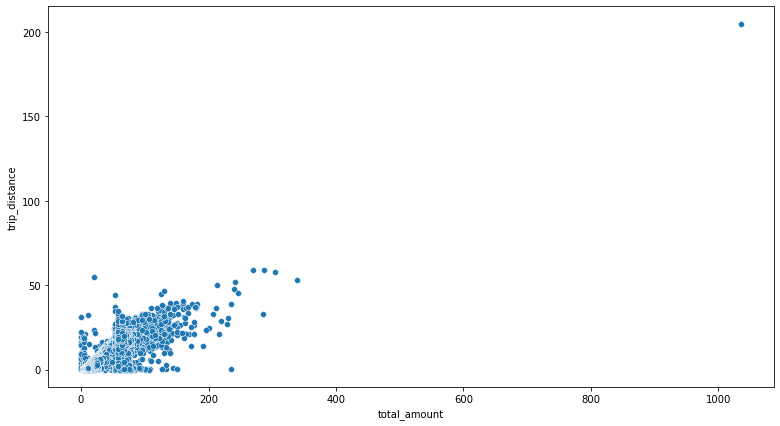

In [15]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='total_amount', y='trip_distance', data=df)
plt.show()

In [10]:
X = df[['total_amount', 'trip_distance']].values

In [8]:
score = []
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit_predict(X)
    score.append(model.inertia_)

##### Elbow Analysis
- Used for get an ideal number for clustering
- Inertia => sum of squared distance data point to the closer centroid
- The most optimal K is when the decrease in intertia is no longer significant

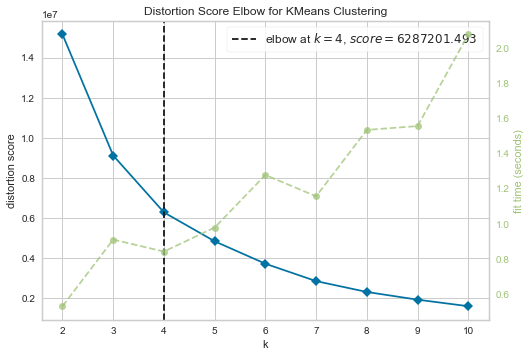

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X)
Elbow_M.show()

Based on Elbow Analysis the number of clusters is 4

In [38]:
model_KM = KMeans(n_clusters = 4, random_state=42)

In [40]:
cluster = model_KM.fit_predict(X)

In [41]:
df['segment'] = cluster

In [42]:
df.head()

,VENDOR,passenger_count,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,segment
0,2,2,7.22,1,N,1,22.5,0.5,0.5,4.76,0.00,0.3,28.56,132,28,3
1,1,1,7.50,1,N,1,25.0,0.5,0.5,4.00,0.00,0.3,30.30,230,33,2
2,2,1,9.74,1,N,1,34.0,0.5,0.5,6.16,5.76,0.3,47.22,138,249,2
3,2,5,10.92,1,N,1,31.5,0.5,0.5,7.71,5.76,0.3,46.27,138,161,2
4,1,1,10.50,1,N,1,32.5,0.5,0.5,5.07,0.00,0.3,38.87,148,165,2


In [45]:
centroid = model_KM.cluster_centers_

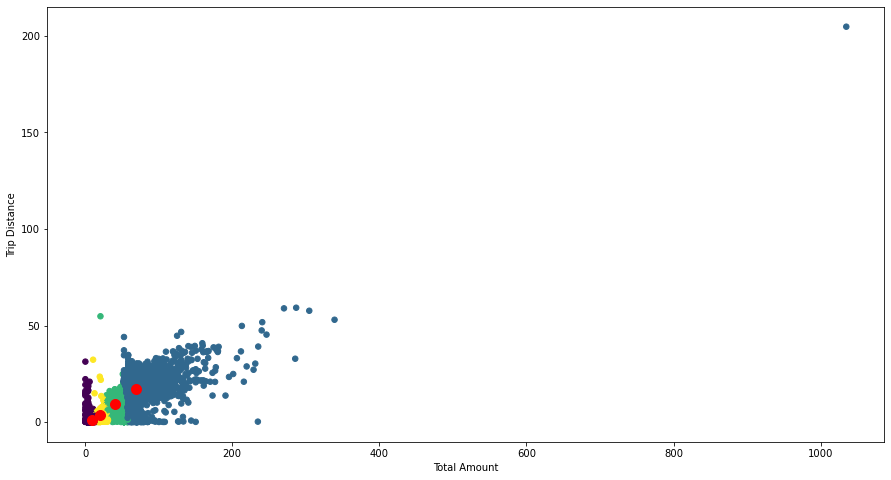

In [46]:
plt.figure(figsize=(15,8))
plt.scatter(x=X[:,0], y=X[:,1], c=cluster, s=30)
plt.scatter(x=centroid[:,0], y=centroid[:,1], c='r', s=100)
plt.xlabel("Total Amount")
plt.ylabel("Trip Distance")
plt.show()

Save data for visualization using Tableau

In [56]:
df.to_csv('dentsu.csv')

##### Evaluating Model

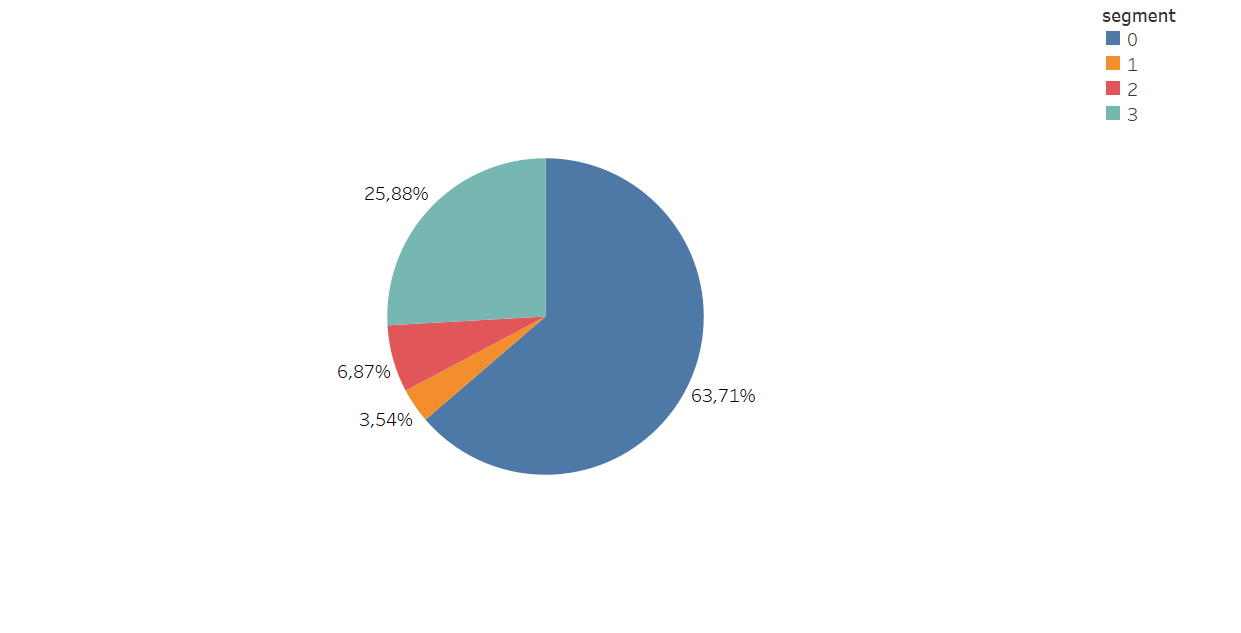

Based on graph above, it is known that cluster **0** has the highest rate rate, followed by cluster **3, 2, 1**  . 

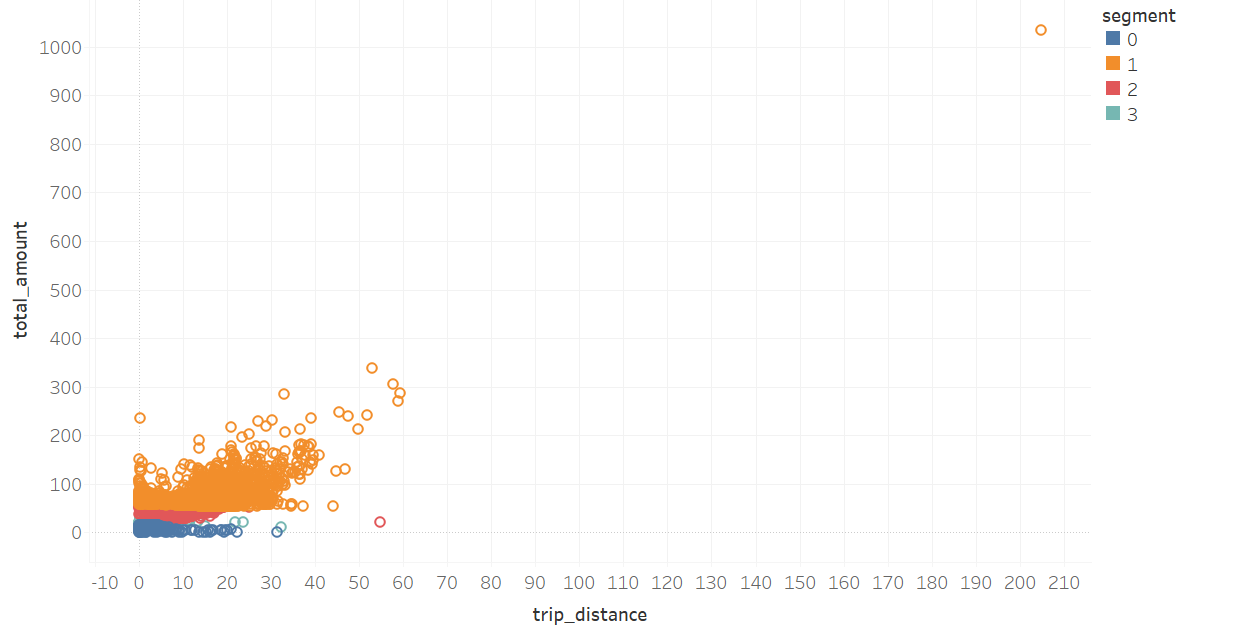

In [ ]:
group 0: short and average trip distance & low total fee amount
group 1: short and long trip distance & high total fee amount
group 2: shot trip distance & average total fee amount
group 3: average trip distance & low total fee amount

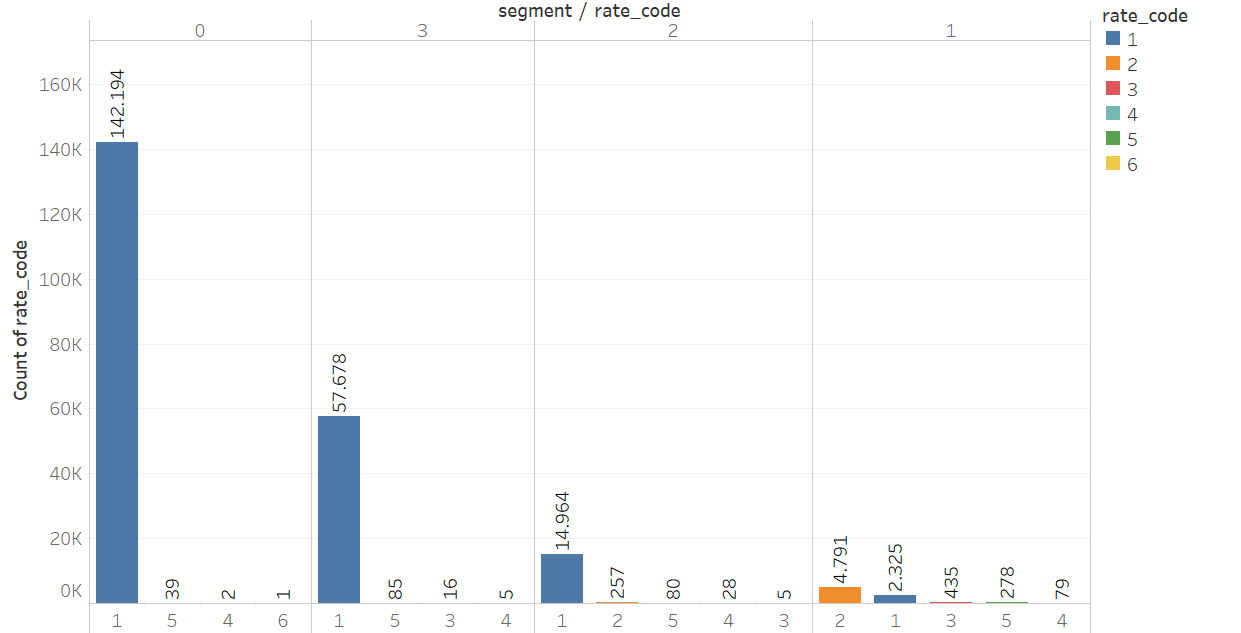

In [ ]:
group 0, 3, 2: Standart rate
group 1: JFK final rate

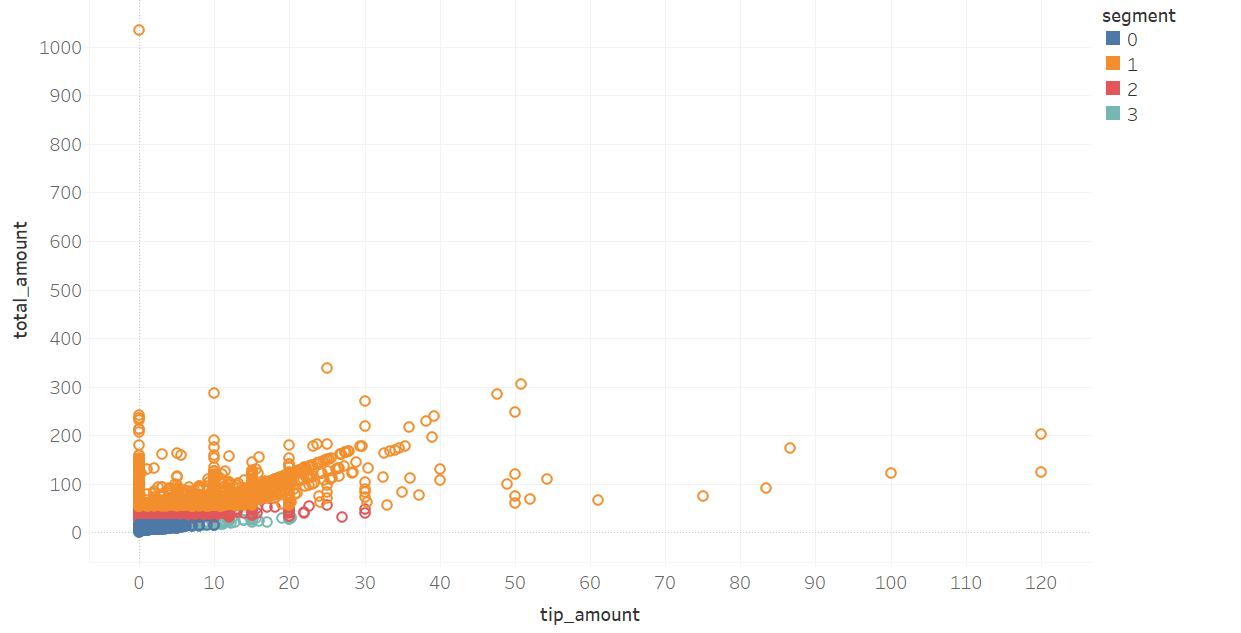

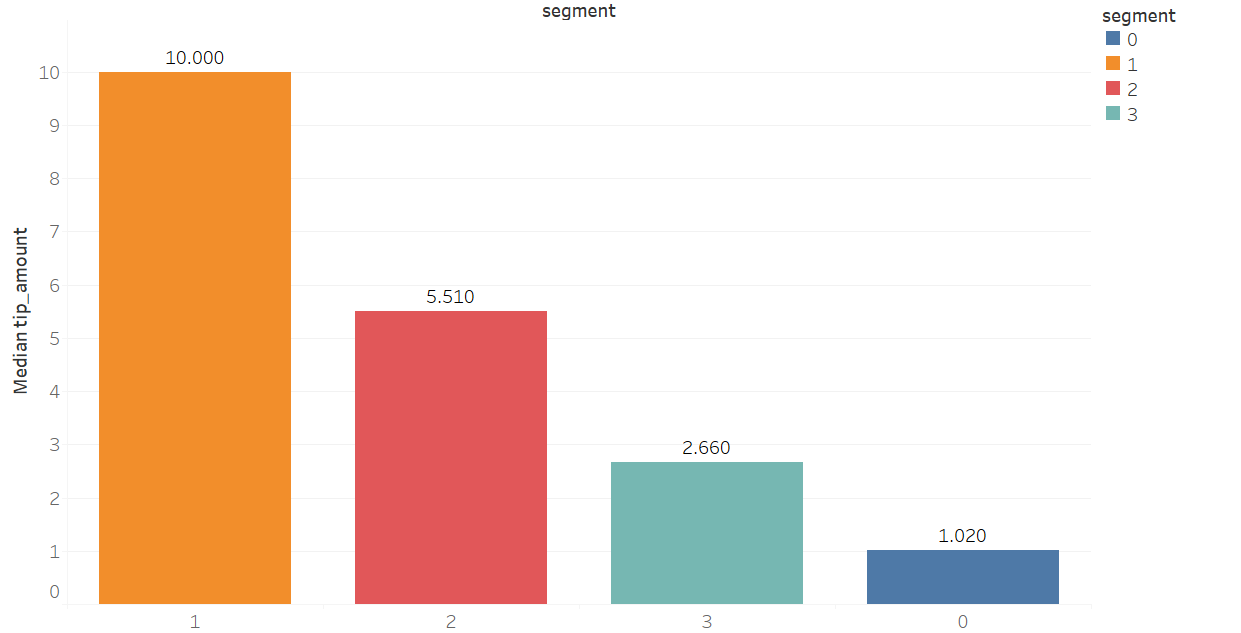

In [ ]:
group 0: the lowest tip given
group 1: the highest tip given
group 2: average tip given between the lowest and the highest
group 3: low tip given

#### Profiling

##### Group 0:
- Short and average trip distance & low total fee amount
- Standart rate
- The lowest tip given

##### Group 1:
- Short and long trip distance & high total fee amount
- JFK final rate
- The highest tip given

##### Group 2:
- Shot trip distance & average total fee amount
- Standart rate
- Average tip given between the lowest and the highest

##### Group 3:
- Average trip distance & low total fee amount
- Standart rate
- Low tip given

#### Segmenting
##### Group 0:
- Low Income
- Within city mobility

##### Group 1:
- Highest Income
- Within city and and long trip mobility including to JFK(airport)

##### Group 2:
- Average income
- Within city mobility

##### Group 3:
- Low income
- Within city mobility